[View in Colaboratory](https://colab.research.google.com/github/sgrpanchal31/newtest/blob/master/sonar.ipynb)

In [0]:
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving sonar.all-data.csv to sonar.all-data.csv


In [5]:
!ls

datalab  sonar.all-data.csv


In [0]:
import tensorflow as tf

In [0]:
#node1 = tf.constant(3.0, tf.float32)
#node2 = tf.constant(4.0)

W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)

lin_model = W*x + b

init = tf.global_variables_initializer()

#print(node1, node2)

In [0]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(lin_model - y)
loss = tf.reduce_sum(squared_deltas)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [9]:
sess = tf.Session()
sess.run(init)
for i in range(1000):
  sess.run(train, {x:[1,2,3,4], y:[0, -1, -2, -3]})
  
#print(sess.run(loss, {x:[1,2,3,4], y:[0, -1, -2, -3]}))
print(sess.run([W, b]))
sess.close()

[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


In [10]:
!ls

datalab


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels, n_unique_labels))
  one_hot_encode[np.arange(n_labels), labels] = 1
  return (one_hot_encode)

In [9]:
df = pd.read_csv('sonar.all-data.csv')
X = df[df.columns[0:60]].values
y = df[df.columns[60]]

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)
print(X.shape)

(207, 60)


In [0]:
X, Y = shuffle(X, Y, random_state = 1)

In [0]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state = 415)

In [12]:
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print(n_dim)
n_class = 2

n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

60


In [0]:
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [0]:
def multilayer_perceptron(x, weights, biases):
  layer_1 = tf.add(tf.matmul(x, weights['h1'], transpose_a=False), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  
  layer_2 = tf.add(tf.matmul(x, weights['h2'], transpose_a=False), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  
  layer_3 = tf.add(tf.matmul(x, weights['h3'], transpose_a=False), biases['b3'])
  layer_3 = tf.nn.sigmoid(layer_3)
  
  layer_4 = tf.add(tf.matmul(x, weights['h4'], transpose_a=False), biases['b4'])
  layer_4 = tf.nn.relu(layer_4)
  
  out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
  
  return out_layer

In [0]:
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [16]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()

y = multilayer_perceptron(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [0]:
sess = tf.Session()
sess.run(init)

In [18]:
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
  sess.run(training_step, feed_dict={x:train_x,y_:train_y})
  cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  pred_y = sess.run(y, feed_dict={x:test_x})
  mse = tf.reduce_mean(tf.square(pred_y - test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy = sess.run(accuracy, feed_dict={x:train_x, y_: train_y})
  accuracy_history.append(accuracy)
  
  print('epoch: ', epoch, ' - ', 'cost: ', cost, ' - MSE: ', mse_, '- Test accuracy: ', accuracy)



epoch:  0  -  cost:  38.29211  - MSE:  1208.0698779203606 - Test accuracy:  0.45454547
epoch:  1  -  cost:  10.168725  - MSE:  181.62996548841235 - Test accuracy:  0.54545456
epoch:  2  -  cost:  4.4918594  - MSE:  31.651939376830278 - Test accuracy:  0.45454547
epoch:  3  -  cost:  7.4802155  - MSE:  110.98482251881417 - Test accuracy:  0.54545456
epoch:  4  -  cost:  1.2451801  - MSE:  15.938786168529624 - Test accuracy:  0.6666667
epoch:  5  -  cost:  0.86864984  - MSE:  11.929551446384643 - Test accuracy:  0.6242424
epoch:  6  -  cost:  0.7663778  - MSE:  11.697382533229122 - Test accuracy:  0.6909091
epoch:  7  -  cost:  0.94887596  - MSE:  11.50152574714497 - Test accuracy:  0.53939396
epoch:  8  -  cost:  1.7871007  - MSE:  16.807650611870617 - Test accuracy:  0.54545456
epoch:  9  -  cost:  1.3642216  - MSE:  13.17249153443851 - Test accuracy:  0.46060607
epoch:  10  -  cost:  1.5799063  - MSE:  15.346505061511266 - Test accuracy:  0.55151516
epoch:  11  -  cost:  0.67478067  -

epoch:  96  -  cost:  0.30027756  - MSE:  10.457810293895605 - Test accuracy:  0.8606061
epoch:  97  -  cost:  0.29878232  - MSE:  10.918049955245595 - Test accuracy:  0.8969697
epoch:  98  -  cost:  0.30054545  - MSE:  10.517014827237839 - Test accuracy:  0.8545455
epoch:  99  -  cost:  0.29455706  - MSE:  10.909260382295704 - Test accuracy:  0.9030303
epoch:  100  -  cost:  0.29654437  - MSE:  10.487874915701541 - Test accuracy:  0.8606061
epoch:  101  -  cost:  0.29467058  - MSE:  10.995369393608286 - Test accuracy:  0.90909094
epoch:  102  -  cost:  0.29464057  - MSE:  10.536109082569215 - Test accuracy:  0.8727273
epoch:  103  -  cost:  0.28649825  - MSE:  10.876970319908889 - Test accuracy:  0.9030303
epoch:  104  -  cost:  0.28721416  - MSE:  10.521530028898255 - Test accuracy:  0.8727273
epoch:  105  -  cost:  0.28496987  - MSE:  11.028802717784231 - Test accuracy:  0.9030303
epoch:  106  -  cost:  0.2866166  - MSE:  10.591108022008013 - Test accuracy:  0.8787879
epoch:  107  -

epoch:  174  -  cost:  0.20092884  - MSE:  10.65514981591935 - Test accuracy:  0.93333334
epoch:  175  -  cost:  0.19960748  - MSE:  11.175635043469773 - Test accuracy:  0.92727274
epoch:  176  -  cost:  0.20058727  - MSE:  10.626001644049799 - Test accuracy:  0.93333334
epoch:  177  -  cost:  0.19897893  - MSE:  11.170183600859364 - Test accuracy:  0.92727274
epoch:  178  -  cost:  0.20131198  - MSE:  10.604233898978205 - Test accuracy:  0.93333334
epoch:  179  -  cost:  0.20189385  - MSE:  11.267708725028365 - Test accuracy:  0.92727274
epoch:  180  -  cost:  0.20366845  - MSE:  10.653375383020208 - Test accuracy:  0.92727274
epoch:  181  -  cost:  0.20238374  - MSE:  11.271025494615701 - Test accuracy:  0.92727274
epoch:  182  -  cost:  0.20684838  - MSE:  10.643472422271795 - Test accuracy:  0.91515154
epoch:  183  -  cost:  0.20455018  - MSE:  11.286694387551123 - Test accuracy:  0.92121214
epoch:  184  -  cost:  0.20851813  - MSE:  10.648512464302112 - Test accuracy:  0.91515154


epoch:  238  -  cost:  0.15917467  - MSE:  11.008454920559684 - Test accuracy:  0.93939394
epoch:  239  -  cost:  0.15686421  - MSE:  11.669639313650018 - Test accuracy:  0.95151514
epoch:  240  -  cost:  0.1616971  - MSE:  10.995722829954607 - Test accuracy:  0.93939394
epoch:  241  -  cost:  0.16038112  - MSE:  11.74612725927808 - Test accuracy:  0.94545454
epoch:  242  -  cost:  0.1640857  - MSE:  11.003541618096461 - Test accuracy:  0.93333334
epoch:  243  -  cost:  0.1612696  - MSE:  11.771840944338257 - Test accuracy:  0.94545454
epoch:  244  -  cost:  0.16629608  - MSE:  11.01168312648853 - Test accuracy:  0.93333334
epoch:  245  -  cost:  0.1630985  - MSE:  11.813282953596943 - Test accuracy:  0.94545454
epoch:  246  -  cost:  0.16739714  - MSE:  11.003562721348427 - Test accuracy:  0.93333334
epoch:  247  -  cost:  0.16525035  - MSE:  11.873729505436861 - Test accuracy:  0.95151514
epoch:  248  -  cost:  0.16846514  - MSE:  10.980931073116333 - Test accuracy:  0.93333334
epoch

epoch:  302  -  cost:  0.10062391  - MSE:  11.825242058756398 - Test accuracy:  0.9818182
epoch:  303  -  cost:  0.10073831  - MSE:  12.194515820282101 - Test accuracy:  0.9939394
epoch:  304  -  cost:  0.101151966  - MSE:  11.848096650177805 - Test accuracy:  0.9818182
epoch:  305  -  cost:  0.100745276  - MSE:  12.251716326221532 - Test accuracy:  0.9939394
epoch:  306  -  cost:  0.10119107  - MSE:  11.86652611314878 - Test accuracy:  0.9818182
epoch:  307  -  cost:  0.10089812  - MSE:  12.284048379748786 - Test accuracy:  0.9939394
epoch:  308  -  cost:  0.10130243  - MSE:  11.873282748631762 - Test accuracy:  0.9818182
epoch:  309  -  cost:  0.1010442  - MSE:  12.291934169253652 - Test accuracy:  0.9939394
epoch:  310  -  cost:  0.1016516  - MSE:  11.86856180574703 - Test accuracy:  0.9818182
epoch:  311  -  cost:  0.10147934  - MSE:  12.35139384289074 - Test accuracy:  0.9878788
epoch:  312  -  cost:  0.102009706  - MSE:  11.900715271280408 - Test accuracy:  0.9757576
epoch:  313 

epoch:  366  -  cost:  0.07174617  - MSE:  12.856478698534456 - Test accuracy:  0.9939394
epoch:  367  -  cost:  0.071337834  - MSE:  13.011961340468355 - Test accuracy:  0.9939394
epoch:  368  -  cost:  0.07109875  - MSE:  12.886531315680346 - Test accuracy:  0.9939394
epoch:  369  -  cost:  0.07087536  - MSE:  13.064708404929888 - Test accuracy:  0.9939394
epoch:  370  -  cost:  0.07071222  - MSE:  12.925804905952868 - Test accuracy:  0.9939394
epoch:  371  -  cost:  0.070302315  - MSE:  13.0865994334873 - Test accuracy:  0.9939394
epoch:  372  -  cost:  0.070130736  - MSE:  12.946894378627963 - Test accuracy:  0.9939394
epoch:  373  -  cost:  0.06968277  - MSE:  13.119051172482548 - Test accuracy:  0.9939394
epoch:  374  -  cost:  0.06932957  - MSE:  12.99711442051488 - Test accuracy:  0.9939394
epoch:  375  -  cost:  0.06908799  - MSE:  13.17417615822816 - Test accuracy:  0.9939394
epoch:  376  -  cost:  0.06888655  - MSE:  13.041339637856519 - Test accuracy:  0.9939394
epoch:  377

epoch:  416  -  cost:  0.058667436  - MSE:  13.671877493911232 - Test accuracy:  0.9939394
epoch:  417  -  cost:  0.058410905  - MSE:  13.790990663177933 - Test accuracy:  0.9939394
epoch:  418  -  cost:  0.05817206  - MSE:  13.674948557459599 - Test accuracy:  0.9939394
epoch:  419  -  cost:  0.0579655  - MSE:  13.791790166207326 - Test accuracy:  0.9939394
epoch:  420  -  cost:  0.057745013  - MSE:  13.693714734965061 - Test accuracy:  0.9939394
epoch:  421  -  cost:  0.057488475  - MSE:  13.820085066813228 - Test accuracy:  0.9939394
epoch:  422  -  cost:  0.057265062  - MSE:  13.705612821702474 - Test accuracy:  0.9939394
epoch:  423  -  cost:  0.057033017  - MSE:  13.819159715088873 - Test accuracy:  0.9939394
epoch:  424  -  cost:  0.05684536  - MSE:  13.72830920907618 - Test accuracy:  0.9939394
epoch:  425  -  cost:  0.056611337  - MSE:  13.855996394842961 - Test accuracy:  0.9939394
epoch:  426  -  cost:  0.056386318  - MSE:  13.742592572458147 - Test accuracy:  0.9939394
epoc

epoch:  462  -  cost:  0.049330395  - MSE:  14.134304390456485 - Test accuracy:  0.9939394
epoch:  463  -  cost:  0.04916229  - MSE:  14.22110450560123 - Test accuracy:  0.9939394
epoch:  464  -  cost:  0.049038246  - MSE:  14.172087932676602 - Test accuracy:  0.9939394
epoch:  465  -  cost:  0.04884609  - MSE:  14.21631905537525 - Test accuracy:  0.9939394
epoch:  466  -  cost:  0.048714362  - MSE:  14.177804408049383 - Test accuracy:  0.9939394
epoch:  467  -  cost:  0.048557263  - MSE:  14.256953733798664 - Test accuracy:  0.9939394
epoch:  468  -  cost:  0.04846156  - MSE:  14.172241767869975 - Test accuracy:  0.9939394
epoch:  469  -  cost:  0.048276093  - MSE:  14.264908854384405 - Test accuracy:  0.9939394
epoch:  470  -  cost:  0.04812789  - MSE:  14.197119825566176 - Test accuracy:  0.9939394
epoch:  471  -  cost:  0.04797138  - MSE:  14.288290870791684 - Test accuracy:  0.9939394
epoch:  472  -  cost:  0.047793783  - MSE:  14.201810776641244 - Test accuracy:  0.9939394
epoch:

epoch:  508  -  cost:  0.04241765  - MSE:  14.558674712610188 - Test accuracy:  1.0
epoch:  509  -  cost:  0.042262018  - MSE:  14.634989453889629 - Test accuracy:  1.0
epoch:  510  -  cost:  0.04215299  - MSE:  14.565050745175457 - Test accuracy:  1.0
epoch:  511  -  cost:  0.042014334  - MSE:  14.65033359283673 - Test accuracy:  1.0
epoch:  512  -  cost:  0.041893493  - MSE:  14.603072815796272 - Test accuracy:  1.0
epoch:  513  -  cost:  0.041743275  - MSE:  14.678853049839777 - Test accuracy:  1.0
epoch:  514  -  cost:  0.04165983  - MSE:  14.608185635249892 - Test accuracy:  1.0
epoch:  515  -  cost:  0.041512225  - MSE:  14.69687500936414 - Test accuracy:  1.0
epoch:  516  -  cost:  0.04140104  - MSE:  14.635907120171684 - Test accuracy:  1.0
epoch:  517  -  cost:  0.041224  - MSE:  14.709679815830905 - Test accuracy:  1.0
epoch:  518  -  cost:  0.041106768  - MSE:  14.644419978413778 - Test accuracy:  1.0
epoch:  519  -  cost:  0.040948875  - MSE:  14.721202212937875 - Test accu

epoch:  556  -  cost:  0.03663019  - MSE:  14.949652197697912 - Test accuracy:  1.0
epoch:  557  -  cost:  0.036531847  - MSE:  15.01072576560928 - Test accuracy:  1.0
epoch:  558  -  cost:  0.036430854  - MSE:  14.961650969777782 - Test accuracy:  1.0
epoch:  559  -  cost:  0.036307126  - MSE:  15.02172358828069 - Test accuracy:  1.0
epoch:  560  -  cost:  0.036227606  - MSE:  14.975522741527 - Test accuracy:  1.0
epoch:  561  -  cost:  0.036083654  - MSE:  15.055167970317646 - Test accuracy:  1.0
epoch:  562  -  cost:  0.035999026  - MSE:  14.988350663763992 - Test accuracy:  1.0
epoch:  563  -  cost:  0.03586972  - MSE:  15.048155287511705 - Test accuracy:  1.0
epoch:  564  -  cost:  0.03576399  - MSE:  15.007254932891643 - Test accuracy:  1.0
epoch:  565  -  cost:  0.03565989  - MSE:  15.056011997991343 - Test accuracy:  1.0
epoch:  566  -  cost:  0.035575636  - MSE:  15.008012536446266 - Test accuracy:  1.0
epoch:  567  -  cost:  0.035456214  - MSE:  15.074509444910166 - Test accu

epoch:  604  -  cost:  0.031965174  - MSE:  15.255908591667932 - Test accuracy:  1.0
epoch:  605  -  cost:  0.0318848  - MSE:  15.313008218234526 - Test accuracy:  1.0
epoch:  606  -  cost:  0.03181422  - MSE:  15.28687137588678 - Test accuracy:  1.0
epoch:  607  -  cost:  0.03171221  - MSE:  15.333990787058172 - Test accuracy:  1.0
epoch:  608  -  cost:  0.031642053  - MSE:  15.284707434370164 - Test accuracy:  1.0
epoch:  609  -  cost:  0.031529646  - MSE:  15.341337437071756 - Test accuracy:  1.0
epoch:  610  -  cost:  0.031466868  - MSE:  15.309128859006567 - Test accuracy:  1.0
epoch:  611  -  cost:  0.03136227  - MSE:  15.35628597423286 - Test accuracy:  1.0
epoch:  612  -  cost:  0.031296756  - MSE:  15.306538139144479 - Test accuracy:  1.0
epoch:  613  -  cost:  0.03120346  - MSE:  15.358650829684157 - Test accuracy:  1.0
epoch:  614  -  cost:  0.031122584  - MSE:  15.317887345430517 - Test accuracy:  1.0
epoch:  615  -  cost:  0.03101921  - MSE:  15.375582048498302 - Test accu

epoch:  652  -  cost:  0.028163187  - MSE:  15.569570653086165 - Test accuracy:  1.0
epoch:  653  -  cost:  0.028075105  - MSE:  15.621864871762615 - Test accuracy:  1.0
epoch:  654  -  cost:  0.028010944  - MSE:  15.59860552749191 - Test accuracy:  1.0
epoch:  655  -  cost:  0.02794114  - MSE:  15.622955080711304 - Test accuracy:  1.0
epoch:  656  -  cost:  0.027868155  - MSE:  15.615479988835153 - Test accuracy:  1.0
epoch:  657  -  cost:  0.0277999  - MSE:  15.648969933274797 - Test accuracy:  1.0
epoch:  658  -  cost:  0.0277411  - MSE:  15.616106757437034 - Test accuracy:  1.0
epoch:  659  -  cost:  0.027669163  - MSE:  15.660717035153132 - Test accuracy:  1.0
epoch:  660  -  cost:  0.027607566  - MSE:  15.644986612820535 - Test accuracy:  1.0
epoch:  661  -  cost:  0.027528752  - MSE:  15.687397368313043 - Test accuracy:  1.0
epoch:  662  -  cost:  0.027450914  - MSE:  15.64005060721918 - Test accuracy:  1.0
epoch:  663  -  cost:  0.027369194  - MSE:  15.689590136027418 - Test ac

epoch:  700  -  cost:  0.025000867  - MSE:  15.950413690738221 - Test accuracy:  1.0
epoch:  701  -  cost:  0.02494534  - MSE:  15.950593037800978 - Test accuracy:  1.0
epoch:  702  -  cost:  0.024886953  - MSE:  15.939260052306363 - Test accuracy:  1.0
epoch:  703  -  cost:  0.02482495  - MSE:  15.964583576463175 - Test accuracy:  1.0
epoch:  704  -  cost:  0.02477015  - MSE:  15.96234198969008 - Test accuracy:  1.0
epoch:  705  -  cost:  0.024705447  - MSE:  15.977789132497465 - Test accuracy:  1.0
epoch:  706  -  cost:  0.024657313  - MSE:  15.97054350024979 - Test accuracy:  1.0
epoch:  707  -  cost:  0.024605053  - MSE:  15.993772466926028 - Test accuracy:  1.0
epoch:  708  -  cost:  0.024562782  - MSE:  15.967718762750998 - Test accuracy:  1.0
epoch:  709  -  cost:  0.024489556  - MSE:  16.013562967545436 - Test accuracy:  1.0
epoch:  710  -  cost:  0.02444009  - MSE:  16.013184500981854 - Test accuracy:  1.0
epoch:  711  -  cost:  0.024387717  - MSE:  16.04108451882464 - Test ac

epoch:  748  -  cost:  0.022410162  - MSE:  16.234652360180707 - Test accuracy:  1.0
epoch:  749  -  cost:  0.022344287  - MSE:  16.26980599773532 - Test accuracy:  1.0
epoch:  750  -  cost:  0.022297975  - MSE:  16.276621914793456 - Test accuracy:  1.0
epoch:  751  -  cost:  0.022255352  - MSE:  16.27363677656397 - Test accuracy:  1.0
epoch:  752  -  cost:  0.0222025  - MSE:  16.272825180306548 - Test accuracy:  1.0
epoch:  753  -  cost:  0.022152072  - MSE:  16.300209020557197 - Test accuracy:  1.0
epoch:  754  -  cost:  0.022108927  - MSE:  16.29308140471299 - Test accuracy:  1.0
epoch:  755  -  cost:  0.022047728  - MSE:  16.306840479985464 - Test accuracy:  1.0
epoch:  756  -  cost:  0.022007314  - MSE:  16.304176648625486 - Test accuracy:  1.0
epoch:  757  -  cost:  0.021960821  - MSE:  16.31167074576235 - Test accuracy:  1.0
epoch:  758  -  cost:  0.02190547  - MSE:  16.329596819607506 - Test accuracy:  1.0
epoch:  759  -  cost:  0.021864558  - MSE:  16.3337583070666 - Test accu

epoch:  796  -  cost:  0.020200904  - MSE:  16.534127537364395 - Test accuracy:  1.0
epoch:  797  -  cost:  0.02016779  - MSE:  16.560529385278624 - Test accuracy:  1.0
epoch:  798  -  cost:  0.020121112  - MSE:  16.550740135611075 - Test accuracy:  1.0
epoch:  799  -  cost:  0.020068867  - MSE:  16.565379987550937 - Test accuracy:  1.0
epoch:  800  -  cost:  0.02002904  - MSE:  16.565854506002136 - Test accuracy:  1.0
epoch:  801  -  cost:  0.019987065  - MSE:  16.59094804230483 - Test accuracy:  1.0
epoch:  802  -  cost:  0.019947324  - MSE:  16.56562098134756 - Test accuracy:  1.0
epoch:  803  -  cost:  0.019914089  - MSE:  16.59123658977982 - Test accuracy:  1.0
epoch:  804  -  cost:  0.019871186  - MSE:  16.57584329758716 - Test accuracy:  1.0
epoch:  805  -  cost:  0.019827165  - MSE:  16.605499309793565 - Test accuracy:  1.0
epoch:  806  -  cost:  0.019784821  - MSE:  16.576056826329197 - Test accuracy:  1.0
epoch:  807  -  cost:  0.01973037  - MSE:  16.60895729849388 - Test acc

epoch:  844  -  cost:  0.01828821  - MSE:  16.783945635654266 - Test accuracy:  1.0
epoch:  845  -  cost:  0.018247852  - MSE:  16.809160503975722 - Test accuracy:  1.0
epoch:  846  -  cost:  0.018216807  - MSE:  16.807895832579703 - Test accuracy:  1.0
epoch:  847  -  cost:  0.018176833  - MSE:  16.81722002722341 - Test accuracy:  1.0
epoch:  848  -  cost:  0.018138621  - MSE:  16.813697287109534 - Test accuracy:  1.0
epoch:  849  -  cost:  0.018112637  - MSE:  16.82714782676043 - Test accuracy:  1.0
epoch:  850  -  cost:  0.018070215  - MSE:  16.83006304607379 - Test accuracy:  1.0
epoch:  851  -  cost:  0.018036665  - MSE:  16.83477706928366 - Test accuracy:  1.0
epoch:  852  -  cost:  0.017996904  - MSE:  16.841346132273333 - Test accuracy:  1.0
epoch:  853  -  cost:  0.0179659  - MSE:  16.846191212895256 - Test accuracy:  1.0
epoch:  854  -  cost:  0.017928539  - MSE:  16.830527641665725 - Test accuracy:  1.0
epoch:  855  -  cost:  0.017887862  - MSE:  16.850708651621876 - Test ac

epoch:  892  -  cost:  0.016661879  - MSE:  17.025429827715143 - Test accuracy:  1.0
epoch:  893  -  cost:  0.016629558  - MSE:  17.006447181139603 - Test accuracy:  1.0
epoch:  894  -  cost:  0.016597556  - MSE:  17.023270765166277 - Test accuracy:  1.0
epoch:  895  -  cost:  0.016565185  - MSE:  17.032168959302197 - Test accuracy:  1.0
epoch:  896  -  cost:  0.01654152  - MSE:  17.02812639922727 - Test accuracy:  1.0
epoch:  897  -  cost:  0.0165094  - MSE:  17.027311452163726 - Test accuracy:  1.0
epoch:  898  -  cost:  0.016473535  - MSE:  17.045431561169174 - Test accuracy:  1.0
epoch:  899  -  cost:  0.01644758  - MSE:  17.041460771476864 - Test accuracy:  1.0
epoch:  900  -  cost:  0.01641572  - MSE:  17.05063071364687 - Test accuracy:  1.0
epoch:  901  -  cost:  0.016379803  - MSE:  17.052135965897822 - Test accuracy:  1.0
epoch:  902  -  cost:  0.016356755  - MSE:  17.0610803231543 - Test accuracy:  1.0
epoch:  903  -  cost:  0.01632683  - MSE:  17.051875848889328 - Test accur

epoch:  940  -  cost:  0.015250491  - MSE:  17.194152107257693 - Test accuracy:  1.0
epoch:  941  -  cost:  0.015227139  - MSE:  17.20447794360055 - Test accuracy:  1.0
epoch:  942  -  cost:  0.015203384  - MSE:  17.19061027104282 - Test accuracy:  1.0
epoch:  943  -  cost:  0.015170652  - MSE:  17.213939647843095 - Test accuracy:  1.0
epoch:  944  -  cost:  0.0151442485  - MSE:  17.196883412060625 - Test accuracy:  1.0
epoch:  945  -  cost:  0.015119715  - MSE:  17.221124043413983 - Test accuracy:  1.0
epoch:  946  -  cost:  0.0150919305  - MSE:  17.213870842250046 - Test accuracy:  1.0
epoch:  947  -  cost:  0.015065256  - MSE:  17.225805333456815 - Test accuracy:  1.0
epoch:  948  -  cost:  0.01503642  - MSE:  17.2210903939362 - Test accuracy:  1.0
epoch:  949  -  cost:  0.015013587  - MSE:  17.24472309596643 - Test accuracy:  1.0
epoch:  950  -  cost:  0.014991786  - MSE:  17.22111469039143 - Test accuracy:  1.0
epoch:  951  -  cost:  0.0149597945  - MSE:  17.249837496183023 - Test

epoch:  988  -  cost:  0.014038185  - MSE:  17.434694298508482 - Test accuracy:  1.0
epoch:  989  -  cost:  0.014017738  - MSE:  17.44879455376996 - Test accuracy:  1.0
epoch:  990  -  cost:  0.013984966  - MSE:  17.439910976414474 - Test accuracy:  1.0
epoch:  991  -  cost:  0.013963946  - MSE:  17.465286940337982 - Test accuracy:  1.0
epoch:  992  -  cost:  0.013941893  - MSE:  17.44757801978885 - Test accuracy:  1.0
epoch:  993  -  cost:  0.013913094  - MSE:  17.46921103256944 - Test accuracy:  1.0
epoch:  994  -  cost:  0.013892571  - MSE:  17.470986168034994 - Test accuracy:  1.0
epoch:  995  -  cost:  0.013867017  - MSE:  17.47779862471198 - Test accuracy:  1.0
epoch:  996  -  cost:  0.013844305  - MSE:  17.481903791230625 - Test accuracy:  1.0
epoch:  997  -  cost:  0.01382641  - MSE:  17.49983628631751 - Test accuracy:  1.0
epoch:  998  -  cost:  0.013802151  - MSE:  17.484456268308804 - Test accuracy:  1.0
epoch:  999  -  cost:  0.013778311  - MSE:  17.508304813029063 - Test a

ValueError: ignored

In [19]:
save_path = saver.save(sess, './')
print('Model saved in file %s'%save_path)

Model saved in file ./


In [20]:
!ls

checkpoint  datalab  sonar.all-data.csv


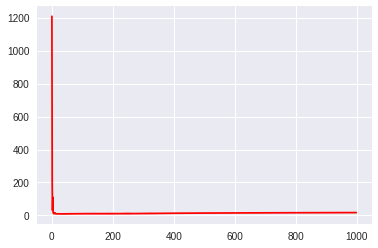

In [21]:
plt.plot(mse_history, 'r')
plt.show()

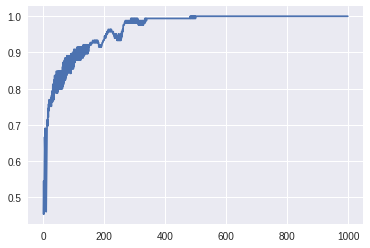

In [22]:
plt.plot(accuracy_history)
plt.show()

In [26]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test Accuracy: ', (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Test Accuracy:  0.9047619


In [29]:
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print('MSE:%.4f'%sess.run(mse))

MSE:17.5083
